In [1]:
import numpy as np
from scipy.stats import uniform
from scipy.stats import norm

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import PK_MONDclass as MONDclass

In [2]:
gplus = 1.2 * 10 ** -10
MONDmodel = MONDclass.MOND(gplus)

In [3]:
vdata = np.array([150, 20])
rdata = np.array([10, 2])
MONDmodel.v_obs(vdata, rdata)

array([203.86550597,  43.91884696])

In [4]:
sampleObsInfo = pd.read_csv('sampleObsInfo135.csv', 
                            names=['GalaName','HubbleType','Distance','DisErr',
                                   'DisMethod','Inclination','inclinationErr','totLum3p6','LumErr',
                                   'Reff','SurfBeff','Rd',
                                   'CentSurfB','M_HI','R_HI',
                                   'Vf','VfErr','Q','Ref'],
                            index_col = 'GalaName')

In [5]:
name = 'NGC6195'
data = np.loadtxt('./SPARC/Rotmod/'+name+'_rotmod.dat', delimiter='\t', skiprows=2)

In [6]:
data

array([[1.3300e+00, 1.7500e+02, 1.3600e+01, 0.0000e+00, 5.3180e+01,
        2.3680e+02, 5.8162e+02, 2.9919e+03],
       [2.3400e+00, 2.3700e+02, 3.6500e+00, 0.0000e+00, 8.4900e+01,
        2.5848e+02, 5.1434e+02, 1.2330e+03],
       [3.3300e+00, 2.4700e+02, 3.8100e+00, 0.0000e+00, 1.1089e+02,
        2.5869e+02, 4.5595e+02, 6.9585e+02],
       [4.3400e+00, 2.4200e+02, 3.5600e+00, 0.0000e+00, 1.3339e+02,
        2.5532e+02, 4.0321e+02, 3.8439e+02],
       [5.3500e+00, 2.4000e+02, 4.2000e+00, 1.1000e-01, 1.5234e+02,
        2.4796e+02, 3.5656e+02, 2.5103e+02],
       [6.3400e+00, 2.3300e+02, 4.5900e+00, 0.0000e+00, 1.6835e+02,
        2.4298e+02, 3.1608e+02, 1.4916e+02],
       [7.3400e+00, 2.3300e+02, 4.6300e+00, 0.0000e+00, 1.8251e+02,
        2.3583e+02, 2.7986e+02, 6.9120e+01],
       [8.3200e+00, 2.4700e+02, 6.4100e+00, 1.9600e+00, 1.9278e+02,
        2.2667e+02, 2.3030e+02, 3.2440e+01],
       [9.3400e+00, 2.4800e+02, 7.6400e+00, 1.5340e+01, 1.9880e+02,
        2.1670e+02, 2.1143e+

In [7]:
Ndata = len(data)

In [8]:
with open('./SPARC/Rotmod/CamB_rotmod.dat','r') as f:
#     info = f.read()
    while True:
        info = f.readline()
        if info[0] == '#':
            print(info)
        else:
            break
            
# data2
print(data)

# Distance = 3.36 Mpc

# Rad	Vobs	errV	Vgas	Vdisk	Vbul	SBdisk	SBbul		

# kpc	km/s	km/s	km/s	km/s	km/s	L/pc^2	L/pc^2

[[1.3300e+00 1.7500e+02 1.3600e+01 0.0000e+00 5.3180e+01 2.3680e+02
  5.8162e+02 2.9919e+03]
 [2.3400e+00 2.3700e+02 3.6500e+00 0.0000e+00 8.4900e+01 2.5848e+02
  5.1434e+02 1.2330e+03]
 [3.3300e+00 2.4700e+02 3.8100e+00 0.0000e+00 1.1089e+02 2.5869e+02
  4.5595e+02 6.9585e+02]
 [4.3400e+00 2.4200e+02 3.5600e+00 0.0000e+00 1.3339e+02 2.5532e+02
  4.0321e+02 3.8439e+02]
 [5.3500e+00 2.4000e+02 4.2000e+00 1.1000e-01 1.5234e+02 2.4796e+02
  3.5656e+02 2.5103e+02]
 [6.3400e+00 2.3300e+02 4.5900e+00 0.0000e+00 1.6835e+02 2.4298e+02
  3.1608e+02 1.4916e+02]
 [7.3400e+00 2.3300e+02 4.6300e+00 0.0000e+00 1.8251e+02 2.3583e+02
  2.7986e+02 6.9120e+01]
 [8.3200e+00 2.4700e+02 6.4100e+00 1.9600e+00 1.9278e+02 2.2667e+02
  2.3030e+02 3.2440e+01]
 [9.3400e+00 2.4800e+02 7.6400e+00 1.5340e+01 1.9880e+02 2.1670e+02
  2.1143e+02 1.4680e+01]
 [1.0380e+01 2.4200e+02 9.0500e+00 2.5140e+01 

In [9]:
R_gala = data[:,0]
Rmax = max(R_gala)

V_obs = data[:,1]
V_errV = data[:,2]

Vobsmax = max(V_obs + V_errV)

V_gas = data[:,3]
V_disk = data[:,4]
V_bulge = data[:,5]
YN_bulge = any(V_bulge)

if YN_bulge:
    dof = Ndata - 2
else:
    dof = Ndata - 1

Text(0.5,1,'Gala Name')

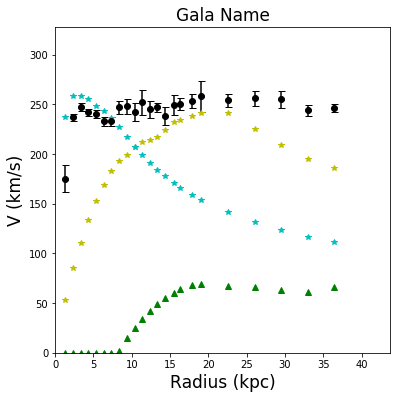

In [10]:
fig, ax = plt.subplots(figsize=(6,6))
ax.errorbar(R_gala, V_obs, yerr=V_errV, fmt='ko', ecolor='k', capsize=3.5)
ax.plot(#R_gala, V_obs, 'ko',
        R_gala, V_disk, 'y*',
        R_gala, V_gas, 'g^',
        R_gala, V_bulge, 'c*')
        #R_gala, V_nfw, 'mo')
# ax.plot(R_gala, vtot_test, 'ro')
ax.set_xlim(0,Rmax*1.2)
ax.set_ylim(0,Vobsmax*1.2)
ax.set_xlabel('Radius (kpc)',fontsize=17)
ax.set_ylabel('V (km/s)',fontsize=17)
ax.set_title('Gala Name',fontsize=17)

In [11]:
s = 1
sunmass = 1
kpc = 1
gy = 1e9*365*24*60*60*s
km = 1/(3.0857*1e16)*kpc
m = 1/(3.0857*1e16*1e3)*kpc
cm = 1/(3.0857*1e16*1e3*1e2)*kpc
kg = 1/(1.989*1e30)*sunmass
g = 1/(1.989*1e30*1e3)*sunmass
ng = 6.67408*1e-11*m**3/(kg*s**2)

In [12]:
def v_baryon(M7L_disk, M7L_bulge=0):
    return np.sqrt(M7L_disk*V_disk**2 + M7L_bulge*V_bulge**2 + V_gas**2)

def v_disk(M7L_disk):
    return np.sqrt(M7L_disk) * V_disk

def v_total(R_gala, M7L_disk, M7L_bulge=0):
    vbar = v_baryon(M7L_disk, M7L_bulge)
    return MONDmodel.v_obs(vbar, R_gala)

# chi2 per dof
def calc_chi2dof(M7L_disk, M7L_bulge=0):
    vtot = v_total(R_gala, M7L_disk, M7L_bulge)
    chi2 = np.sum(((vtot - V_obs)**2 / V_errV**2))
    return 1 / dof * chi2

In [13]:
vtot_test = v_total(R_gala, 0.3, 0.5)

In [14]:
vtot_test

array([178.04235535, 202.41135828, 212.36468503, 219.84353741,
       224.46683379, 229.81557646, 233.63406769, 235.38077908,
       236.25396405, 238.39739181, 240.13266413, 241.60466289,
       244.22744736, 247.71940857, 252.38800786, 254.82535597,
       258.44808483, 261.00770088, 263.19974143, 260.03618144,
       255.51498084, 252.37664948, 253.3061141 ])

Text(0.5,1,'Gala Name')

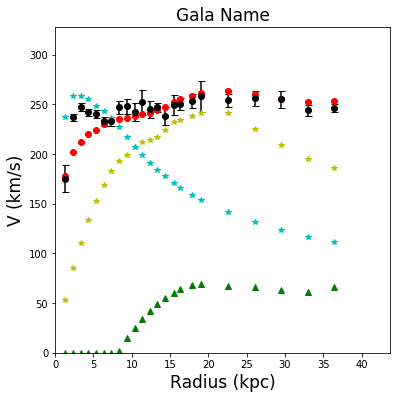

In [15]:
fig, ax = plt.subplots(figsize=(6,6))
ax.errorbar(R_gala, V_obs, yerr=V_errV, fmt='ko', ecolor='k', capsize=3.5)
ax.plot(R_gala, vtot_test, 'ro',
        R_gala, V_disk, 'y*',
        R_gala, V_gas, 'g^',
        R_gala, V_bulge, 'c*')
        #R_gala, V_nfw, 'mo')
# ax.plot(R_gala, vtot_test, 'ro')
ax.set_xlim(0,Rmax*1.2)
ax.set_ylim(0,Vobsmax*1.2)
ax.set_xlabel('Radius (kpc)',fontsize=17)
ax.set_ylabel('V (km/s)',fontsize=17)
ax.set_title('Gala Name',fontsize=17)

In [16]:
def make_uniform_prior(start, width):
    def inner(x):
        return uniform.pdf(x, start, width)
    return inner

# prior_M7Ldisk_unif = make_uniform_prior(-1, 1-(-1))
# prior_M7Lbulge_unif = make_uniform_prior(-1, 1-(-1))

prior_M7Ldisk_unif = make_uniform_prior(0.1, 10-(0.1))
prior_M7Lbulge_unif = make_uniform_prior(0.1, 10-(0.1))

def make_norm(mean, sd):
    def inner(x):
        return norm.pdf(x, mean, sd)
    return inner

prior_M7Ldisk_norm = make_norm(np.log10(0.5), 0.1)
prior_M7Lbulge_norm = make_norm(np.log10(0.7), 0.1)


In [17]:
np.array([1,2,3])[1]

2

In [18]:
prior_M7Ldisk_unif(2), prior_M7Ldisk_norm(0.5)

(0.10101010101010101, 4.652409065449253e-14)

In [19]:
# theta = [M7Ldisk]

def lnprior(theta):
    M7L_disk, M7L_bulge = theta
    if (0.1 <= M7L_disk <= 10) and (0.1 <= M7L_bulge <= 10):
        prior = prior_M7Ldisk_unif(M7L_disk) * prior_M7Lbulge_unif(M7L_bulge)
        return np.log10(prior)
    else:
        return -np.inf
    
def lnlike(theta):
    M7L_disk, M7L_bulge = theta
    vtot = v_total(R_gala, M7L_disk, M7L_bulge)
    like = -1/2 * np.sum(((vtot - V_obs)**2 / V_errV**2))
    return like

def lnprob(theta):
    lp = lnprior(theta)
#     print(lp)
    if not np.isfinite(lp):
        return -np.inf
#     if lp == np.log(10**-100):
#         return lp
    return lp + lnlike(theta)

In [20]:
lnprior([11, 4]), lnlike([0.4,6]), lnprob([11,4])

(-inf, -37398.7942747647, -inf)

In [21]:
ndim, nwalkers = 2, 10
# theta = (log10_M200, c200err, M/L_disk)
pos = [np.array([4,6]) + 3* np.random.random_sample(ndim) for i in range(nwalkers)]

In [22]:
pos

[array([4.65346056, 7.28630026]),
 array([6.49653724, 8.61234954]),
 array([4.28557903, 6.97345304]),
 array([5.46904806, 6.69346796]),
 array([4.58446424, 6.97725554]),
 array([6.01268995, 6.60264444]),
 array([6.29933588, 7.87894506]),
 array([4.17463693, 8.50738879]),
 array([6.34926922, 7.83002572]),
 array([4.34546757, 7.2830557 ])]

In [23]:
import emcee
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob)

In [24]:
sampler.run_mcmc(pos, 5000)

(array([[0.14889428, 0.69265408],
        [0.15886908, 0.70360969],
        [0.17489722, 0.68342385],
        [0.19134382, 0.69275382],
        [0.18151865, 0.69152427],
        [0.14684965, 0.71784159],
        [0.17920071, 0.68081959],
        [0.17390657, 0.68985288],
        [0.143975  , 0.70832905],
        [0.1540055 , 0.69356296]]),
 array([-22.35715413, -21.49262269, -21.61823594, -23.2249765 ,
        -21.94191504, -22.59419805, -21.8154594 , -21.44127282,
        -22.16212375, -21.7800643 ]),
 ('MT19937', array([ 510540190, 4159996208, 2491379930, 3302304551, 1552753695,
         3685414575, 1139887959, 2998235588, 3557654227, 4000098576,
         1200671022, 2466179287, 1975084908, 1064262722, 2159322543,
          103835472, 3209738906, 3487274170,  500057281, 3975574327,
         2546839497,  374660373, 3752171829, 1558029953, 1498706531,
         2962359384,  146695767, 1673047103, 3005824084, 1691972346,
         3341363786,  593980599,  891021754,  714165812, 1946383843

In [25]:
mcmcchain = sampler.chain
mcmcchain

array([[[4.65346056, 7.28630026],
        [4.65346056, 7.28630026],
        [3.10940254, 6.79123046],
        ...,
        [0.14638974, 0.69125301],
        [0.14889428, 0.69265408],
        [0.14889428, 0.69265408]],

       [[6.49653724, 8.61234954],
        [6.49653724, 8.61234954],
        [6.43120291, 8.50739011],
        ...,
        [0.17659923, 0.69257827],
        [0.15886908, 0.70360969],
        [0.15886908, 0.70360969]],

       [[4.27852019, 6.93696129],
        [4.34402113, 5.94676812],
        [4.04314177, 6.06327922],
        ...,
        [0.17683291, 0.69263123],
        [0.17520467, 0.68491461],
        [0.17489722, 0.68342385]],

       ...,

       [[4.17551082, 8.49417804],
        [4.17551082, 8.49417804],
        [4.17551082, 8.49417804],
        ...,
        [0.17630541, 0.69025196],
        [0.17630541, 0.69025196],
        [0.17390657, 0.68985288]],

       [[6.2363786 , 7.79382972],
        [6.2363786 , 7.79382972],
        [6.2363786 , 7.79382972],
        .

In [26]:
mcmcchain.shape

(10, 5000, 2)

In [27]:
samples = sampler.chain.reshape((-1,ndim))
samples

array([[4.65346056, 7.28630026],
       [4.65346056, 7.28630026],
       [3.10940254, 6.79123046],
       ...,
       [0.15530033, 0.69623771],
       [0.1540055 , 0.69356296],
       [0.1540055 , 0.69356296]])

In [28]:
samples.shape

(50000, 2)

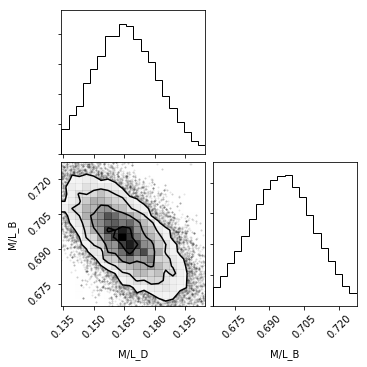

In [29]:
import corner
fig = corner.corner(samples, range=[0.95,0.95], labels=["M/L_D", "M/L_B"])

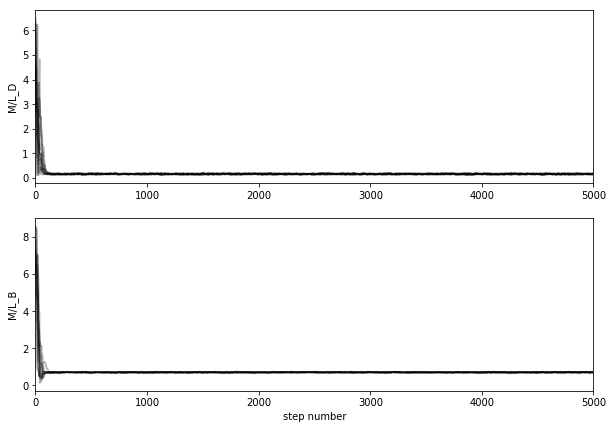

In [30]:
fig, axes = plt.subplots(2, figsize=(10, 7))
labels = ["M/L_D", "M/L_B"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(sampler.chain[:, :, i].T, "k", alpha=0.3)
    ax.set_xlim(0, 5000)
#     ax.set_ylim(0.2, 0.4)
    ax.set_ylabel(labels[i])
#     ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

In [31]:
post_prob = list(map(lnprob, samples))

In [32]:
mid = 50 # middle value
dev = 68.27 / 2 # deviation from the middle value
postlow = np.percentile(post_prob, mid - dev, interpolation='lower')
postmid = np.percentile(post_prob, mid, interpolation='lower')
posthigh = np.percentile(post_prob, mid + dev, interpolation='lower')
postmax = np.max(post_prob)
postlow, postmid, posthigh, postmax

(-23.23109655864436,
 -22.02502951359104,
 -21.479134849719966,
 -21.30136333450428)

In [33]:
posilow = np.argwhere(post_prob == postlow)[0,0]
posimid = np.argwhere(post_prob == postmid)[0,0]
posihigh = np.argwhere(post_prob == posthigh)[0,0]
posimax = np.argwhere(post_prob == postmax)[0,0]
posilow, posimid, posihigh, posimax

(28173, 30770, 35535, 22049)

In [34]:
np.array([2]) * np.array([1,2])

array([2, 4])

In [35]:
M7Lmax_chain = samples[posimax]
M7Lmax, M7LmaxB = samples[posimax]
minchi2dof = calc_chi2dof(M7Lmax, M7LmaxB)
M7Lmax, M7LmaxB, minchi2dof, dof

(0.1653167139137512, 0.6946813085384426, 1.8390564709818265, 21)

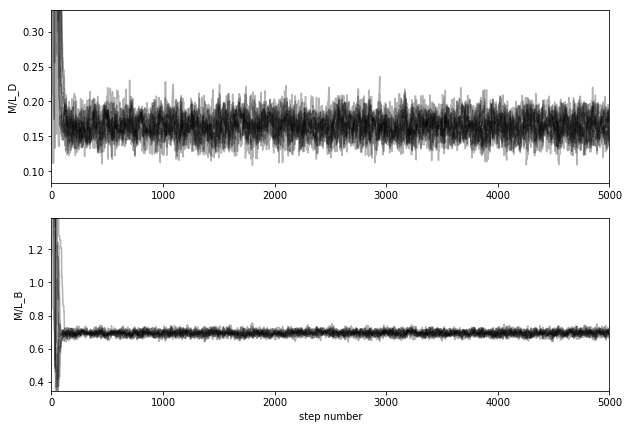

In [36]:
fig, axes = plt.subplots(2, figsize=(10, 7))
labels = ["M/L_D", "M/L_B"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(sampler.chain[:, :, i].T, "k", alpha=0.3)
    ax.set_xlim(0, 5000)
    ax.set_ylim(M7Lmax_chain[i]/2, M7Lmax_chain[i]*2)
    ax.set_ylabel(labels[i])
#     ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

In [37]:
M7Llow, M7LlowB = samples[posilow]
M7Lhigh, M7LhighB = samples[posihigh]

vtot_low = v_total(R_gala, M7Llow, M7LlowB)
vtot_high = v_total(R_gala, M7Lhigh, M7LhighB)

vbar_low = v_baryon(M7Llow, M7LlowB)
vbar_high = v_baryon(M7Lhigh, M7LhighB)

vdisk_low = v_disk(M7Llow)
vdisk_high = v_disk(M7Lhigh)

print(vtot_low)
print(vtot_high)
print(vbar_low)
print(vbar_high)
print(vdisk_low)
print(vdisk_high)

M7Llow, M7LlowB, M7Lhigh, M7LhighB

[208.23792108 233.06194515 240.45817518 244.93523711 246.09380276
 248.54561335 249.18906975 247.81690867 245.92379346 244.87461005
 244.19699634 243.80509997 244.34093973 245.49727212 247.39929211
 248.39068961 249.86078206 250.7412313  250.25948101 247.5549895
 244.0037149  241.71340909 243.22525638]
[205.72833355 230.55354536 238.21438676 242.99983018 244.510518
 247.26522457 248.24018214 247.19149843 245.58107099 244.86804614
 244.44304893 244.24284695 245.00202998 246.41854512 248.63741702
 249.79291968 251.50996988 252.59163101 252.43043357 249.64132933
 245.94694778 243.52998509 244.94112554]
[202.32751655 222.08068389 223.87534462 222.81751337 218.49041562
 216.09948808 211.96449558 205.95392372 199.46789856 194.13250813
 189.69428045 185.78641116 183.09592832 181.25296665 179.80943747
 178.36205117 175.68833635 173.61621049 165.16964746 155.28096577
 145.71555535 138.07761254 134.81781652]
[199.65944606 219.36007398 221.40228093 220.66144432 216.71407791
 214.6579679  210.8945

(0.14185293428150753,
 0.7228853732531623,
 0.16189294480687028,
 0.702747695876843)

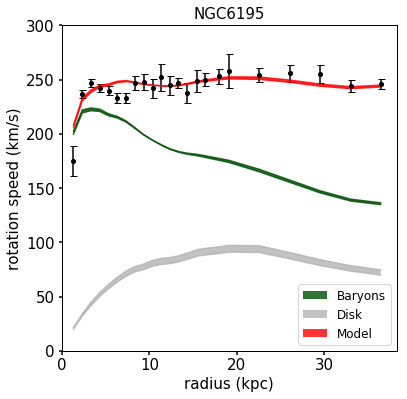

In [38]:
fig, ax = plt.subplots(figsize=(6,6))
ax.errorbar(R_gala, V_obs, yerr=V_errV, fmt='ko', ecolor='k', capsize=3.5, markersize=4)
# ax.plot(R_gala, vtot_test, 'ro',
#         R_gala, V_disk, 'y*',
#         R_gala, V_gas, 'g^',
#         R_gala, V_bulge, 'c*')
        #R_gala, V_nfw, 'mo')
# ax.plot(R_gala, vtot_test, 'ro')

ax.plot(R_gala, vbar_low, color=(0,0.3,0), alpha=0.8)
ax.plot(R_gala, vbar_high, color=(0,0.3,0), alpha=0.8)
ax.plot(R_gala, vdisk_low, color=(0.7,0.7,0.7), alpha=0.8)
ax.plot(R_gala, vdisk_high, color=(0.7,0.7,0.7), alpha=0.8)
ax.plot(R_gala, vtot_low, color=(1,0,0), alpha=0.8)
ax.plot(R_gala, vtot_high, color=(1,0,0), alpha=0.8)

ax.fill_between(R_gala, vbar_low, vbar_high, facecolor=(0,0.3,0), alpha=0.8, label='Baryons')
ax.fill_between(R_gala, vdisk_low, vdisk_high, facecolor=(0.7,0.7,0.7), alpha=0.8, label='Disk')
ax.fill_between(R_gala, vtot_low, vtot_high, facecolor=(1,0,0), alpha=0.8, label='Model')

ax.set_xlim(0,Rmax*1.05)
ax.set_ylim(0,Vobsmax*1.1)
ax.set_xlabel('radius (kpc)',fontsize=15)
ax.set_ylabel('rotation speed (km/s)',fontsize=15)
ax.tick_params(width=1.5, labelsize=15)
ax.set_title(name,fontsize=15)
ax.legend(loc='lower right',fontsize=12)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.)
    
# fig.savefig('./Output_MOND/test/NGC1090.pdf', bbox_inches='tight')

In [39]:
# style
# store the info
# best fit info (m/l disk + bulge, chi2dof, dof) 